In [42]:
import pandas as pd
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
! pip install -q mlflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
import time
import pandas as pd
import mlflow
from mlflow.tracking import MlflowClient
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
from mlflow import MlflowClient
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import mlflow
from sklearn.model_selection import GridSearchCV



%matplotlib inline

In [20]:
imputer=SimpleImputer(strategy="most_frequent")

In [21]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv", na_values={"null","?"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [23]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_15900\1172494880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)


In [24]:
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [25]:
df["Loan_Amount_Term"]=imputer.fit_transform(df[["Loan_Amount_Term"]])
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_15900\2223138656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
C:\Users\youss\AppData\Local\Temp\ipykernel_15900\2223138656.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [26]:
imputer.statistics_

array([360.])

In [27]:
df["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df.dropna(axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [30]:
df.replace(["Male","Female"],[1,0],inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_15900\1040757557.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(["Male","Female"],[1,0],inplace=True)


In [31]:
df.head(30)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,LP001003,1,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,LP001005,1,Yes,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,LP001006,1,Yes,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,LP001008,1,No,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,LP001011,1,Yes,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,LP001013,1,Yes,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,LP001014,1,Yes,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,LP001018,1,Yes,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,LP001020,1,Yes,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N


In [32]:
df.replace(["Yes","No"],[1,0],inplace=True)
df['Loan_Status'].replace({"Y":1 , "N":0},inplace=True)
df.replace(["Graduate","Not Graduate"],[1,0],inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_15900\3509986376.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(["Yes","No"],[1,0],inplace=True)
C:\Users\youss\AppData\Local\Temp\ipykernel_15900\3509986376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Status'].replace({"Y"

In [33]:
x=df.drop(["Loan_Status","Loan_ID","Property_Area"],axis=1)
y=df.Loan_Status
xtrain , xtest ,ytrain,ytest= train_test_split(x ,y ,random_state=40 ,test_size=0.3)

In [34]:
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0
610,1,1,1,0,4106,0.0,40.000000,180.0,1.0
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0


In [35]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [36]:

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

2025/10/27 13:27:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 13:27:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'decisionTree' already exists. Creating a new version of this model...
2025/10/27 13:27:04 WARNING mlflow.tracking._model_registry.fluent: Run with id c8cef04744994c23b634a42e3a1ee13d has no artifacts at artifact path 'model', registering model based on models:/m-f2f7397f1f96471fb2f4b15107c8062c instead
2025/10/27 13:27:04 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: decisionTree, version 3
Created version '3' of model 'decisionTree'.


 Accuracy: 0.67
 Model registered as version: 3
 Alias @dev now points to version: 3
🏃 View run Run for @dev at: http://127.0.0.1:5000/#/experiments/531803474937937342/runs/c8cef04744994c23b634a42e3a1ee13d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/531803474937937342


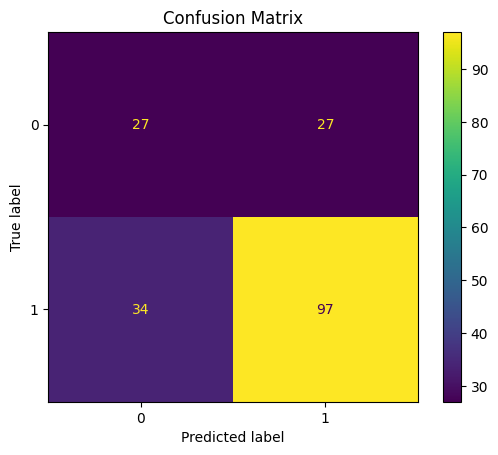

In [38]:

mlflow.set_tracking_uri("http://127.0.0.1:5000")

# 2. Set or create experiment
mlflow.set_experiment("decisionTree")

# 3. Initialize MLflow client
client = MlflowClient()

# 4. Define model registry name and alias
model_name = "decisionTree"
alias_name = "dev"  # change to "staging" or "prod" as needed


# 5. Start MLflow Run

with mlflow.start_run(run_name=f"Run for @{alias_name}"):

    # Train Decision Tree model
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(xtrain, ytrain)

    # Evaluate model performance
    preds = tree_clf.predict(xtest)
    acc = accuracy_score(ytest, preds)

    # 6. Log Parameters and Metrics

    mlflow.log_param("criterion", tree_clf.get_params().get("criterion"))
    mlflow.log_param("max_depth", tree_clf.get_params().get("max_depth"))
    mlflow.log_metric("accuracy", acc)

    
    # 7. Log Model

    mlflow.sklearn.log_model(tree_clf, artifact_path="model")

    # 8. Register model to MLflow Model Registry
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"
    result = mlflow.register_model(model_uri=model_uri, name=model_name)
    version = result.version

    for _ in range(10):
        model_info = client.get_model_version(model_name, version)
        if model_info.status == "READY":
            break
        time.sleep(2)

    # Assign alias (e.g., @dev)
    client.set_registered_model_alias(
        name=model_name,
        alias=alias_name,
        version=version
    )


    df = pd.DataFrame(xtrain, columns=[f"feature_{i}" for i in range(xtrain.shape[1])])
    df["target"] = ytrain
    dataset_path = "train_u6lujuX_CVtuZ9i (1).csv"
    df.to_csv(dataset_path, index=False)
    mlflow.log_artifact(dataset_path, artifact_path="dataset")

    if os.path.exists("mlflow_sample_example.ipynb"):
        mlflow.log_artifact("mlflow_sample_example.ipynb", artifact_path="code")

    # Log confusion matrix image
    ConfusionMatrixDisplay.from_estimator(tree_clf, xtest, ytest)
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png", artifact_path="metrics")


    print(f" Accuracy: {acc:.2f}")
    print(f" Model registered as version: {version}")
    print(f" Alias @{alias_name} now points to version: {version}")


Fitting 5 folds for each of 135 candidates, totalling 675 fits


2025/10/27 14:28:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 14:28:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'decisionTree' already exists. Creating a new version of this model...
2025/10/27 14:28:33 WARNING mlflow.tracking._model_registry.fluent: Run with id 0889e64c849142d99b39a87172036789 has no artifacts at artifact path 'model', registering model based on models:/m-cf951e2580be406fbb1a1a11ae8d2fa7 instead
2025/10/27 14:28:33 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: decisionTree, version 4
Created version '4' of model 'decisionTree'.


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.77
Model registered as version: 4
Alias @dev now points to version: 4
🏃 View run GridSearch for @dev at: http://127.0.0.1:5000/#/experiments/531803474937937342/runs/0889e64c849142d99b39a87172036789
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/531803474937937342


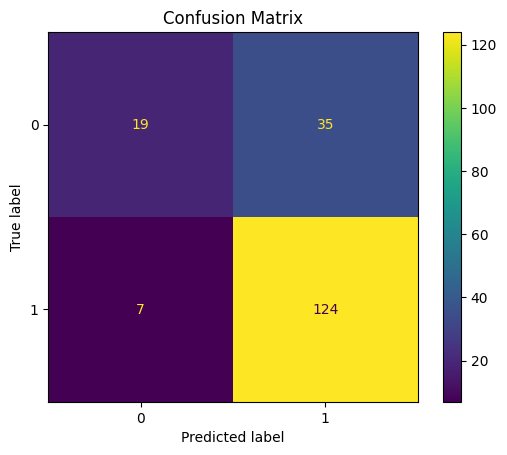

In [43]:
# 1. Set MLflow Tracking URI
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# 2. Set or create experiment
mlflow.set_experiment("decisionTree")

# 3. Initialize MLflow client
client = MlflowClient()

# 4. Define model registry name and alias
model_name = "decisionTree"
alias_name = "dev"  # change to "staging" or "prod" as needed

# 5. Define the parameter grid for Grid Search
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# 6. Start MLflow run
with mlflow.start_run(run_name=f"GridSearch for @{alias_name}"):

    # Set up Grid Search
    base_model = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        scoring="accuracy",
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    # Fit Grid Search
    grid_search.fit(xtrain, ytrain)

    # Get the best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate best model
    preds = best_model.predict(xtest)
    acc = accuracy_score(ytest, preds)

    # Log all hyperparameters and metrics
    mlflow.log_params(best_params)
    mlflow.log_metric("accuracy", acc)

    # 7. Log Model
    mlflow.sklearn.log_model(best_model, artifact_path="model")

    # 8. Register model to MLflow Model Registry
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"
    result = mlflow.register_model(model_uri=model_uri, name=model_name)
    version = result.version

    # Wait until model is ready
    # for _ in range(10):
    #     model_info = client.get_model_version(model_name, version)
    #     if model_info.status == "READY":
    #         break
    #     time.sleep(2)

    # Assign alias (e.g., @dev)
    client.set_registered_model_alias(
        name=model_name,
        alias=alias_name,
        version=version
    )

    # Log dataset used
    df = pd.DataFrame(xtrain, columns=[f"feature_{i}" for i in range(xtrain.shape[1])])
    df["target"] = ytrain
    dataset_path = "train_u6lujuX_CVtuZ9i (1).csv"
    df.to_csv(dataset_path, index=False)
    mlflow.log_artifact(dataset_path, artifact_path="dataset")

    # Log notebook or script if available
    if os.path.exists("Untitled59.ipynb"):
        mlflow.log_artifact("Untitled59.ipynb", artifact_path="code")

    # Log confusion matrix
    ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png", artifact_path="metrics")

    # Print summary
    print("Best Parameters:", best_params)
    print(f"Accuracy: {acc:.2f}")
    print(f"Model registered as version: {version}")
    print(f"Alias @{alias_name} now points to version: {version}")


In [41]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# 3.2 Set the experiment name (will create one if it doesn't exist)
mlflow.set_experiment("RandomForestClassifier1")

# 3.3 Initialize MLflow client (to manage registry and aliases)
client = MlflowClient()

# 4.  Set model registry name and alias (like @dev or @staging or @prod)
model_name = "SimpleRandomForestModel"
alias_name = "dev"  # You can change it to "staging" or "prod"

# 5. Start an MLflow run
with mlflow.start_run(run_name=f"Run for @{alias_name}"):

    # Train RandomForest model
    model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)
    model.fit(xtrain, ytrain)

    # Evaluate accuracy on the test set
    preds = model.predict(xtest)
    acc = accuracy_score(ytest, preds)

    # Log model hyperparameters and metrics
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("accuracy", acc)

    
    # 6. Log and register the model
    # 6.1 Log the trained model to MLflow artifacts
    mlflow.sklearn.log_model(model, "model")

    # 6.2 Build model URI from the run ID
    model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"

    # 6.3 Register the model to the MLflow Model Registry
    result = mlflow.register_model(model_uri=model_uri, name=model_name)
    version = result.version  # Automatically assigned version (e.g., 1, 2, 3...)
    
    #7. Assign an alias (like @dev) to this version
    # Assign alias (e.g., @dev) to this version
    client.set_registered_model_alias(
        name=model_name,
        alias=alias_name,
        version=version
    )


    mlflow.log_artifact("train_u6lujuX_CVtuZ9i (1).csv", artifact_path="dataset")
    mlflow.log_artifact("Untitled59.ipynb", artifact_path="code")

    # Print results
    print(f" Accuracy: {acc:.2f}")
    print(f" Model registered as version: {version}")
    print(f" Alias @{alias_name} now points to version: {version}")

# 8. End the MLflow run
mlflow.end_run()


2025/10/27 13:33:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 13:33:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'SimpleRandomForestModel' already exists. Creating a new version of this model...
2025/10/27 13:33:41 WARNING mlflow.tracking._model_registry.fluent: Run with id 19f2460c752e4a29affc3f1240da6e25 has no artifacts at artifact path 'model', registering model based on models:/m-b88ac612ee464bd286e2c2ba13fc666a instead
2025/10/27 13:33:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SimpleRandomForestModel, version 3
Created version '3' of model 'SimpleRandomForestModel'.


 Accuracy: 0.76
 Model registered as version: 3
 Alias @dev now points to version: 3
🏃 View run Run for @dev at: http://127.0.0.1:5000/#/experiments/902703081764688417/runs/19f2460c752e4a29affc3f1240da6e25
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/902703081764688417


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(xtrain, ytrain)

print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    138.0  291.0       1.0      429.0         429.0
_______________________________________________
Confusion Matrix: 
 [[138   0]
 [  0 291]]

Test Result:
Accuracy Score: 67.03%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.442623    0.782258   0.67027    0.612441      0.683121
recall      0.500000    0.740458   0.67027    0.620229      0.670270
f1-score    0.469565    0.760784   0.67027    0.615175      0.675780
support    54.000000  131.000000   0.67027  185.000000    185.000000
_______________________________________________
Conf